<a href="https://colab.research.google.com/github/bhargavaCharyRudravelli/Bhargava_INFO5731_Fall2024/blob/main/Rudravelli_Bhargava_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [5]:
# Write your code here
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

def load_data(train_file, test_file):
    train_data = pd.read_csv(train_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
    train_data[['sentiment', 'reviews']] = train_data['reviews'].str.split(" ", n=1, expand=True)

    test_data = pd.read_csv(test_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
    test_data[['sentiment', 'reviews']] = test_data['reviews'].str.split(" ", n=1, expand=True)

    return train_data, test_data

#this function is used for data processing part
def clean_text(review, stopword):
    wl = WordNetLemmatizer()
    review = "".join([word.lower() for word in review if word not in string.punctuation])
    review = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    tokens = re.split('\W+', review)
    review = [wl.lemmatize(word) for word in tokens if word not in stopword]
    return ' '.join(review)

def preprocess_data(train_data, test_data):
    nltk.download('stopwords')
    nltk.download('wordnet')
    stopword = stopwords.words('english')

    train_data['clean_reviews'] = train_data['reviews'].apply(clean_text, args=(stopword,))
    test_data['clean_reviews'] = test_data['reviews'].apply(clean_text, args=(stopword,))

    label_encoder = LabelEncoder()
    train_data['sentiment'] = label_encoder.fit_transform(train_data['sentiment'])
    test_data['sentiment'] = label_encoder.transform(test_data['sentiment'])

    return train_data, test_data

def tfidf_vectorization(train_data, test_data):
    tfidf_vect = TfidfVectorizer()
    X_tfidf = tfidf_vect.fit_transform(train_data['clean_reviews'])
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

    X_test_tfidf = tfidf_vect.transform(test_data['clean_reviews'])

    return X_tfidf_df, X_test_tfidf

def evaluate_model(model, X_train, y_train, X_test, y_test, cv=10):
    print("Model: ", type(model).__name__)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    print('Accuracy: {:.2f}%'.format(accuracy))
    print(classification_report(y_test, y_pred))

    scores = cross_val_score(model, X_test, y_test, cv=cv)
    print("Cross-Validation Mean Score: {:.2f}%".format(scores.mean() * 100))
    print("\n")

if __name__ == "__main__":
    train_file = '/content/sample_data/stsa-train.txt'
    test_file = '/content/sample_data/stsa-test.txt'

    train_data, test_data = load_data(train_file, test_file)
    train_data, test_data = preprocess_data(train_data, test_data)
    X_tfidf_df, X_test_tfidf = tfidf_vectorization(train_data, test_data)

    models = [MultinomialNB(fit_prior=False), LinearSVC(), KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
              DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier()]

    for model in models:
        evaluate_model(model, X_tfidf_df, train_data['sentiment'], X_test_tfidf, test_data['sentiment'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Model:  MultinomialNB


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


Accuracy: 81.05%
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       912
           1       0.78      0.86      0.82       909

    accuracy                           0.81      1821
   macro avg       0.81      0.81      0.81      1821
weighted avg       0.81      0.81      0.81      1821

Cross-Validation Mean Score: 72.32%


Model:  LinearSVC


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Accuracy: 79.63%
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       912
           1       0.78      0.83      0.80       909

    accuracy                           0.80      1821
   macro avg       0.80      0.80      0.80      1821
weighted avg       0.80      0.80      0.80      1821

Cross-Validation Mean Score: 70.95%


Model:  KNeighborsClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 50.85%
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       912
           1       0.85      0.02      0.04       909

    accuracy                           0.51      1821
   macro avg       0.68      0.51      0.35      1821
weighted avg       0.68      0.51      0.35      1821

Cross-Validation Mean Score: 52.71%


Model:  DecisionTreeClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 65.84%
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       912
           1       0.67      0.62      0.65       909

    accuracy                           0.66      1821
   macro avg       0.66      0.66      0.66      1821
weighted avg       0.66      0.66      0.66      1821

Cross-Validation Mean Score: 62.50%


Model:  RandomForestClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 74.63%
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       912
           1       0.76      0.72      0.74       909

    accuracy                           0.75      1821
   macro avg       0.75      0.75      0.75      1821
weighted avg       0.75      0.75      0.75      1821

Cross-Validation Mean Score: 65.51%


Model:  XGBClassifier
Accuracy: 49.86%
              precision    recall  f1-score   support

           0       0.50      0.99      0.67       912
           1       0.17      0.00      0.00       909

    accuracy                           0.50      1821
   macro avg       0.33      0.50      0.33      1821
weighted avg       0.33      0.50      0.33      1821

Cross-Validation Mean Score: 65.96%




In [6]:
import pandas as pd
import nltk
import re
import string
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def load_data(train_file, test_file):
    train_data = pd.read_csv(train_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
    train_data[['sentiment', 'reviews']] = train_data['reviews'].str.split(" ", n=1, expand=True)
    test_data= pd.read_csv(test_file, sep='delimiter=', header=None, names=['reviews'], engine='python')[['sentiment', 'reviews']] = pd.read_csv(test_file, sep='delimiter=', header=None, names=['reviews'], engine='python')['reviews'].str.split(" ", n=1, expand=True)

    return train_data, pd.read_csv(test_file, sep='delimiter=', header=None, names=['reviews'], engine='python')

def clean_text(review, stopword):
    wl = WordNetLemmatizer()
    review = "".join([word.lower() for word in review if word not in string.punctuation])
    review = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    tokens = re.split('\W+', review)
    review = [wl.lemmatize(word) for word in tokens if word not in stopword]
    return ' '.join(review)

def load_data(train_file, test_file):
    train_data = pd.read_csv(train_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
    train_data[['sentiment', 'reviews']] = train_data['reviews'].str.split(" ", n=1, expand=True)

    test_data = pd.read_csv(test_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
    test_data[['sentiment', 'reviews']] = test_data['reviews'].str.split(" ", n=1, expand=True)

    return train_data, test_data


def train_word2vec_model(data):
    tokenized_reviews = [review.split() for review in data['clean_reviews']]
    w2v_model = Word2Vec(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)
    return w2v_model

def sentence_embeddings(data):
    model = SentenceTransformer('bert-base-nli-mean-tokens')
    sentence_embeddings = model.encode(data['clean_reviews'])
    return sentence_embeddings

def evaluate_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    report = classification_report(y_test, y_pred, output_dict=True)

    return accuracy, report

if __name__ == "__main__":
    train_file = '/content/sample_data/stsa-train.txt'
    test_file = '/content/sample_data/stsa-test.txt'

    train_data, test_data = load_data(train_file, test_file)
    train_data, test_data = preprocess_data(train_data, test_data)

    #using Word2Vec
    w2v_model = train_word2vec_model(train_data)
    X_train_w2v = []
    for review in train_data['clean_reviews']:
        tokens = review.split()
        review_vectors = []
        for token in tokens:
            if token in w2v_model.wv:
                review_vectors.append(w2v_model.wv[token])
        if review_vectors:
            review_vectors = np.array(review_vectors)
            X_train_w2v.append(review_vectors.mean(axis=0))
        else:
            X_train_w2v.append([0]*100)
    X_test_w2v = []
    for review in test_data['clean_reviews']:
        tokens = review.split()
        review_vectors = []
        for token in tokens:
            if token in w2v_model.wv:
                review_vectors.append(w2v_model.wv[token])
        if review_vectors:
            review_vectors = np.array(review_vectors)
            X_test_w2v.append(review_vectors.mean(axis=0))
        else:
            X_test_w2v.append([0]*100)
    #Using BERT
    X_train_bert = sentence_embeddings(train_data)
    X_test_bert = sentence_embeddings(test_data)

    #model training and evaluation
    rf_model_w2v = RandomForestClassifier()
    accuracy_w2v, report_w2v = evaluate_model(X_train_w2v, train_data['sentiment'], X_test_w2v, test_data['sentiment'], rf_model_w2v)

    rf_model_bert = RandomForestClassifier()
    accuracy_bert, report_bert = evaluate_model(X_train_bert, train_data['sentiment'], X_test_bert, test_data['sentiment'], rf_model_bert)

    print("<=======Results using Word2Vec=======>")
    print('Accuracy: {:.2f}%'.format(accuracy_w2v))
    print("Classification Report:")
    print(report_w2v)
    print("\n")

    print("<=======Results using BERT=======>")
    print('Accuracy: {:.2f}%'.format(accuracy_bert))
    print("Classification Report:")
    print(report_bert)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access publi

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<=======Results using Word2Vec=======>
Accuracy: 54.37%
Classification Report:
{'0': {'precision': 0.5528031290743155, 'recall': 0.4649122807017544, 'f1-score': 0.5050625372245384, 'support': 912.0}, '1': {'precision': 0.5370018975332068, 'recall': 0.6226622662266227, 'f1-score': 0.5766683647478349, 'support': 909.0}, 'accuracy': 0.5436573311367381, 'macro avg': {'precision': 0.5449025133037612, 'recall': 0.5437872734641885, 'f1-score': 0.5408654509861867, 'support': 1821.0}, 'weighted avg': {'precision': 0.5449155291452282, 'recall': 0.5436573311367381, 'f1-score': 0.5408064676027243, 'support': 1821.0}}


<=======Results using BERT=======>
Accuracy: 77.54%
Classification Report:
{'0': {'precision': 0.7976331360946746, 'recall': 0.7390350877192983, 'f1-score': 0.7672168468981218, 'support': 912.0}, '1': {'precision': 0.7561475409836066, 'recall': 0.8118811881188119, 'f1-score': 0.783023872679045, 'support': 909.0}, 'accuracy': 0.7753981328940143, 'macro avg': {'precision': 0.776890338

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [7]:
# Write your code here
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')

data_df = pd.read_csv('/content/sample_data/imdb_reviews.csv')
data_df

print("Shape: {0}".format(data_df.shape))
cluster_data_df = data_df.head(100)
cluster_data_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Shape: (1000, 3)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,username,review,rating
0,Misagh,I had the rather intense privilege to view Jam...,8/10
1,Samiam3,Nobody directs like James Cameron. Ten years i...,9/10
2,yoel-47650,You know the feeling when you start watching a...,9/10
3,gogoschka-1,I'm not exactly sure when it became a thing am...,NaN
4,eldreddsouza,I was waiting for this day for the longest tim...,10/10
...,...,...,...
95,SebaZava,James Cameron has never directed a bad - or ev...,10/10
96,jammerknight,"I've always enjoyed this film, following the r...",9/10
97,alanyuu,"Avatar is a movie about two races, usually cov...",10/10
98,CinemaClown,"12 years ago, James Cameron had a vision of Av...",NaN


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

In [10]:
import nltk
nltk.download('punkt_tab')
cluster_data_df['After noise removal'] = cluster_data_df['review'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))  #Special characters removal
cluster_data_df['Punctuation removal'] = cluster_data_df['After noise removal'].str.replace('[^\w\s]','')                     #Punctuation removal
cluster_data_df['Remove numbers'] = cluster_data_df['Punctuation removal'].str.replace('\d+', '')                             #Remove numbers
stop_word = stopwords.words('english')#stopwords removal
cluster_data_df['Stopwords removal'] = cluster_data_df['Remove numbers'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word)) #Lower Casing
cluster_data_df['Lower casing'] = cluster_data_df['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split())) #Tokenization
cluster_data_df['Tokenization'] = cluster_data_df['Lower casing'].apply(lambda x: TextBlob(x).words)                           #Stemming
st = PorterStemmer()
cluster_data_df['Stemming'] = cluster_data_df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))         #Lemmatization
cluster_data_df['Lemmatization'] = cluster_data_df['Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
cluster_data_df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-10-24ac1b28f684>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data_df['After noise removal'] = cluster_data_df['review'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))  #Special characters removal
<ipython-input-10-24ac1b28f684>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data_df['Punctuation removal'] = cluster_dat

,username,review,rating,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization
0,Misagh,I had the rather intense privilege to view Jam...,8/10,I had the rather intense privilege to view Jam...,I had the rather intense privilege to view Jam...,I had the rather intense privilege to view Jam...,I rather intense privilege view James Cameron ...,i rather intense privilege view james cameron ...,"[i, rather, intense, privilege, view, james, c...",i rather intens privileg view jame cameron muc...,i rather intens privileg view jame cameron muc...
1,Samiam3,Nobody directs like James Cameron. Ten years i...,9/10,Nobody directs like James Cameron Ten years i...,Nobody directs like James Cameron Ten years i...,Nobody directs like James Cameron Ten years i...,Nobody directs like James Cameron Ten years wo...,nobody directs like james cameron ten years wo...,"[nobody, directs, like, james, cameron, ten, y...",nobodi direct like jame cameron ten year work ...,nobodi direct like jame cameron ten year work ...
2,yoel-47650,You know the feeling when you start watching a...,9/10,You know the feeling when you start watching a...,You know the feeling when you start watching a...,You know the feeling when you start watching a...,You know feeling start watching movie realizin...,you know feeling start watching movie realizin...,"[you, know, feeling, start, watching, movie, r...",you know feel start watch movi realiz almost 3...,you know feel start watch movi realiz almost 3...
3,gogoschka-1,I'm not exactly sure when it became a thing am...,NaN,I m not exactly sure when it became a thing am...,I m not exactly sure when it became a thing am...,I m not exactly sure when it became a thing am...,I exactly sure became thing among tribe film g...,i exactly sure became thing among tribe film g...,"[i, exactly, sure, became, thing, among, tribe...",i exactli sure becam thing among tribe film ge...,i exactli sure becam thing among tribe film ge...
4,eldreddsouza,I was waiting for this day for the longest tim...,10/10,I was waiting for this day for the longest tim...,I was waiting for this day for the longest tim...,I was waiting for this day for the longest tim...,I waiting day longest time I kid back 2009 mov...,i waiting day longest time i kid back 2009 mov...,"[i, waiting, day, longest, time, i, kid, back,...",i wait day longest time i kid back 2009 movi r...,i wait day longest time i kid back 2009 movi r...
...,...,...,...,...,...,...,...,...,...,...,...
95,SebaZava,James Cameron has never directed a bad - or ev...,10/10,James Cameron has never directed a bad or ev...,James Cameron has never directed a bad or ev...,James Cameron has never directed a bad or ev...,James Cameron never directed bad even mediocre...,james cameron never directed bad even mediocre...,"[james, cameron, never, directed, bad, even, m...",jame cameron never direct bad even mediocr mot...,jame cameron never direct bad even mediocr mot...
96,jammerknight,"I've always enjoyed this film, following the r...",9/10,I ve always enjoyed this film following the r...,I ve always enjoyed this film following the r...,I ve always enjoyed this film following the r...,I always enjoyed film following release traile...,i always enjoyed film following release traile...,"[i, always, enjoyed, film, following, release,...",i alway enjoy film follow releas trailer secon...,i alway enjoy film follow releas trailer secon...
97,alanyuu,"Avatar is a movie about two races, usually cov...",10/10,Avatar is a movie about two races usually cov...,Avatar is a movie about two races usually cov...,Avatar is a movie about two races usually cov...,Avatar movie two races usually covering human ...,avatar movie two races usually covering human ...,"[avatar, movie, two, races, usually, covering,...",avatar movi two race usual cover human anoth r...,avatar movi two race usual cover human anoth r...
98,CinemaClown,"12 years ago, James Cameron had a vision of

In [11]:
#kmeans clustering using TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(cluster_data_df['Lemmatization'].values)
tfidf.shape

from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters=15, random_state=150)
model_tf.fit(tfidf)

labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[0.        , 0.17252384, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02296869, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00599148, 0.01046457,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
terms1 = tfidf_vect.get_feature_names_out()
terms1[1:10]

array(['000', '09', '10', '100', '11', '12', '13', '15', '150'],
      dtype=object)

In [13]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')
silhouette_score_tf

-0.00644523582729816

In [15]:
df1 = cluster_data_df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

df1.groupby(['Tfidf Clus Label'])['review'].count()

<ipython-input-15-cec1a3d9d569>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tfidf Clus Label'] = model_tf.labels_


,review
Tfidf Clus Label,
0,2
1,3
2,5
3,1
4,64
5,1
6,1
7,1
8,1


In [16]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: 000
 lot
 movi
 comput
 the
 left
 next
 demo
 stuff
 237
Cluster 1: jake
 na
 movi
 watch
 vi
 omaticaya
 neytiri
 great
 chanc
 give
Cluster 2: review
 believ
 seen
 way
 truli
 film
 even
 watch
 soul
 time
Cluster 3: forest
 movi
 feel
 anim
 scenario
 nausicaa
 starcraft
 spore
 colon
 fanci
Cluster 4: movi
 film
 the
 avatar
 cameron
 one
 see
 it
 stori
 like
Cluster 5: 2021
 11
 rate
 can
 may
 wait
 sure
 if
 avatar
 field
Cluster 6: weta
 student
 work
 result
 film
 reason
 instructor
 sensit
 gunpoint
 booooooo
Cluster 7: peopl
 refer
 polit
 bad
 movi
 idea
 modern
 critic
 there
 go
Cluster 8: unobtainium
 english
 rate
 half
 no
 countri
 tough
 odd
 dozen
 wast
Cluster 9: film
 day
 never
 everi
 crazi
 gasp
 end
 clap
 back
 got


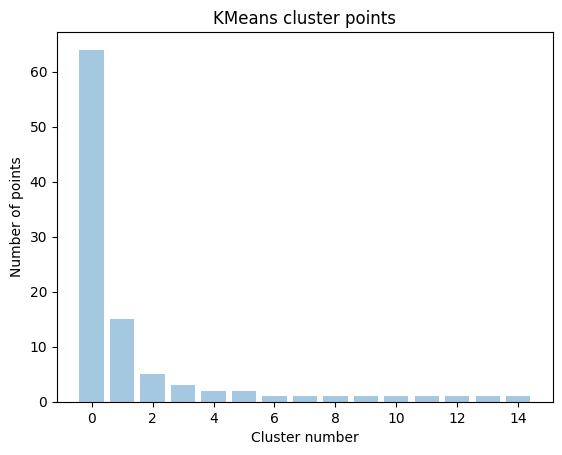

4 reviews assigned to cluster  0
----------------------------------------------------------------------
Entirely computer rendered movies are some of my favorites over the last 10 years. The Incredibles, Up, Toy Story, Finding Nemo, Wall-E, (the list is long!). But Avatar doesn't deserve to be on this list. In fact, given the money spent, it is a failure worth 2/10. However ignoring the budget for a second, it is a 6. A summer block buster popcorn movie that somehow is pretending to be a classic.it is bad? it is so well reviewed!well, first, the 3d. The glasses reduce the brightness, and for someone with good vision it just isn't pleasant to sit for 3 hours with a black fuzzy rim bracketing the screen and a plastic weight on your nose. The 3D effect, when executed, _demands_ you look at whatever is in focus lest you get a headache trying the impossible -- to focus the fuzz outside that spot. This is annoying. When 3d is mostly suppressed you'd really rather be watching a regular big sc

In [18]:
import matplotlib.pyplot as plt

cluster_counts = df1['Tfidf Clus Label'].value_counts()
x_range = range(len(cluster_counts))
plt.bar(x_range, cluster_counts, alpha=0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

for i in range(10):
    print("4 reviews assigned to cluster ", i)
    print("-" * 70)
    group_indices = df1.groupby(['Tfidf Clus Label']).groups.get(i, [])
    if len(group_indices) > 0:
        print(df1.iloc[group_indices[0]]['review'])
        print('\n')
    if len(group_indices) > 5:
        print(df1.iloc[group_indices[5]]['review'])
        print('\n')
    if len(group_indices) > 10:
        print(df1.iloc[group_indices[10]]['review'])
        print('\n')
    print("_" * 70)

Silhouette Score: 0.07013292191004301


<ipython-input-19-9672779ce3e8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data_df['Bow Clus Label'] = kmeans_model.labels_
<ipython-input-19-9672779ce3e8>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data_df['AVG-W2V '] = model.labels_


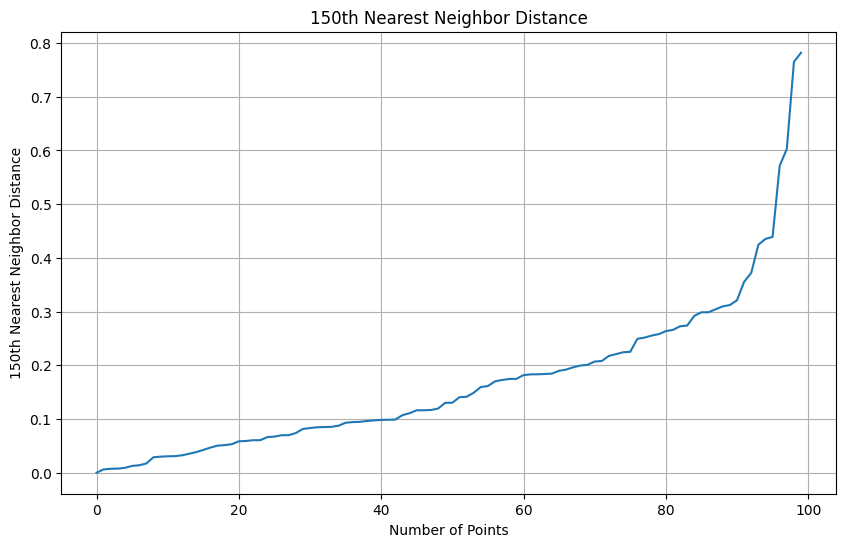

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import gensim
# bag of words features.
count_vect = CountVectorizer()
bow = count_vect.fit_transform(cluster_data_df['review'].values)
kmeans_model = KMeans(n_clusters=10, random_state=42)        # KMeans clustering using bag of words features
kmeans_model.fit(bow)
labels = kmeans_model.labels_
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')   # Calculate silhouette score
print("Silhouette Score:", silhouette_score)
cluster_data_df['Bow Clus Label'] = kmeans_model.labels_
list_of_sent_train = [sentence.split() for sentence in cluster_data_df["Lower casing"].values]   # Train Word2Vec model
w2v_model = gensim.models.Word2Vec(list_of_sent_train, vector_size=100, workers=4)

sent_vectors = []
for sent in list_of_sent_train:
    sent_vec = np.zeros(100)
    cnt_words = 0
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except KeyError:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.nan_to_num(sent_vectors)
minPts = 2 * 150#DBSCAN clustering using Word2Vec features
model = DBSCAN(eps=5, min_samples=minPts, n_jobs=-1)
model.fit(sent_vectors)
cluster_data_df['AVG-W2V '] = model.labels_
distances = pairwise_distances(sent_vectors)#Calculate pairwise distances between samples in the data
sorted_distances = np.sort(distances, axis=0)
#the 150th nearest neighbor distance for each point
if len(sorted_distances[0]) > 99:
    twohundredth_nearest_distances = sorted_distances[:, 99]
else:
    print("Number of data points is less than 100, cannot compute 100th nearest neighbor distance.")
#lot the elbow method graph using the 150th nearest neighbor distances
if len(twohundredth_nearest_distances) > 0:
    plt.figure(figsize=(10, 6))
    plt.plot(twohundredth_nearest_distances)
    plt.title("150th Nearest Neighbor Distance")
    plt.xlabel("Number of Points")
    plt.ylabel("150th Nearest Neighbor Distance")
    plt.grid(True)
    plt.show()


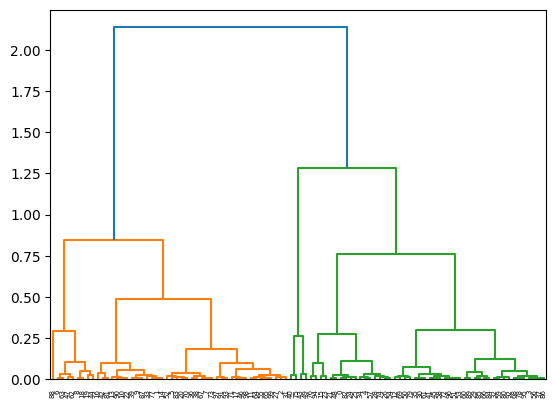

In [20]:
#Hierarchial Clustering
import scipy
from scipy.cluster import hierarchy
dendro = hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method = 'ward'))
plt.axhline(y = 1000)

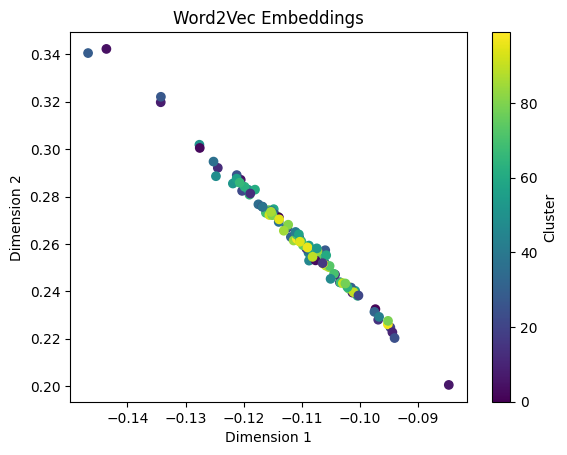

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=100)
kmeans.fit(sent_vectors)
clusters = kmeans.predict(sent_vectors)
plt.scatter(sent_vectors[:, 0], sent_vectors[:, 1], c=clusters, cmap='viridis')
plt.title('Word2Vec Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  1000 non-null   object
 1   review    1000 non-null   object
 2   rating    930 non-null    object
dtypes: object(3)
memory usage: 23.6+ KB


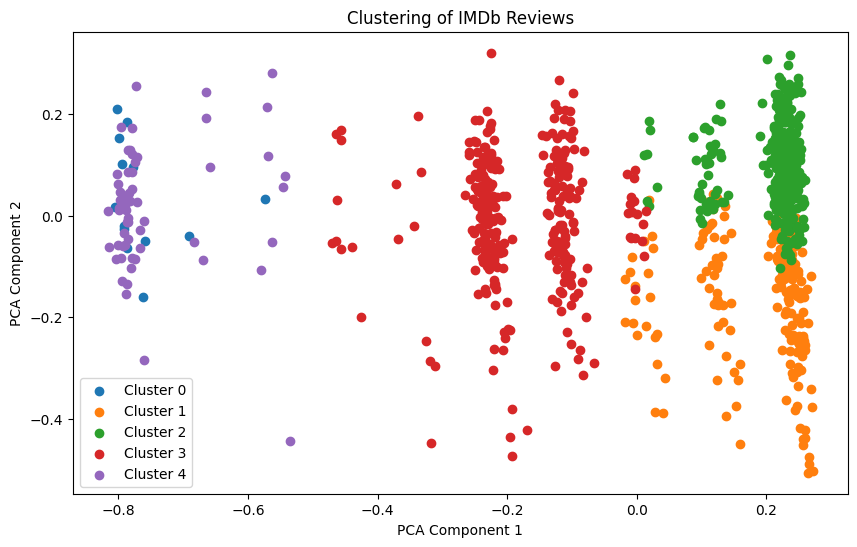

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

##load the dataset
file_path = '/content/sample_data/imdb_reviews.csv'
data = pd.read_csv(file_path)

#display the first few rows of the dataset to understand its content
data.head(), data.info()


#clean and preprocess the dataset
#extract numeric ratings
data['numeric_rating'] = data['rating'].str.extract(r'(\d+)/').astype(float)
data_cleaned = data.dropna(subset=['review', 'numeric_rating']).reset_index(drop=True)
#vectorize the reviews using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
review_vectors = tfidf.fit_transform(data_cleaned['review'])
scaler = MinMaxScaler()
scaled_ratings = scaler.fit_transform(data_cleaned[['numeric_rating']])
features = np.hstack((review_vectors.toarray(), scaled_ratings))
features.shape

#perform K-Means clustering
n_clusters = 5  #assuming 5 clusters for initial exploration
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(features)

#reduce dimensions using PCA for visualization
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(features)

#plotting the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(n_clusters):
    cluster_points = reduced_features[clusters == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')

plt.title('Clustering of IMDb Reviews')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()



**Write your response here:**

.username	review	rating
0	Misagh	I had the rather intense privilege to view Jam...	8/10
1	Samiam3	Nobody directs like James Cameron. Ten years i...	9/10
2	yoel-47650	You know the feeling when you start watching a...	9/10
3	gogoschka-1	I'm not exactly sure when it became a thing am...	NaN
4	eldreddsouza	I was waiting for this day for the longest tim...	10/10
...	...	...	...
95	SebaZava	James Cameron has never directed a bad - or ev...	10/10
96	jammerknight	I've always enjoyed this film, following the r...	9/10
97	alanyuu	Avatar is a movie about two races, usually cov...	10/10
98	CinemaClown	12 years ago, James Cameron had a vision of Av...	NaN
99	Horst_In_Translation	"Avatar" is an American movie from 2009 and st...	6/10

.username	review	rating	After noise removal	Punctuation removal	Remove numbers	Stopwords removal	Lower casing	Tokenization	Stemming	Lemmatization
0	Misagh	I had the rather intense privilege to view Jam...	8/10	I had the rather intense privilege to view Jam...	I had the rather intense privilege to view Jam...	I had the rather intense privilege to view Jam...	I rather intense privilege view James Cameron ...	i rather intense privilege view james cameron ...	[i, rather, intense, privilege, view, james, c...	i rather intens privileg view jame cameron muc...	i rather intens privileg view jame cameron muc...
1	Samiam3	Nobody directs like James Cameron. Ten years i...	9/10	Nobody directs like James Cameron Ten years i...	Nobody directs like James Cameron Ten years i...	Nobody directs like James Cameron Ten years i...	Nobody directs like James Cameron Ten years wo...	nobody directs like james cameron ten years wo...	[nobody, directs, like, james, cameron, ten, y...	nobodi direct like jame cameron ten year work ...	nobodi direct like jame cameron ten year work ...
2	yoel-47650	You know the feeling when you start watching a...	9/10	You know the feeling when you start watching a...	You know the feeling when you start watching a...	You know the feeling when you start watching a...	You know feeling start watching movie realizin...	you know feeling start watching movie realizin...	[you, know, feeling, start, watching, movie, r...	you know feel start watch movi realiz almost 3...	you know feel start watch movi realiz almost 3...
3	gogoschka-1	I'm not exactly sure when it became a thing am...	NaN	I m not exactly sure when it became a thing am...	I m not exactly sure when it became a thing am...	I m not exactly sure when it became a thing am...	I exactly sure became thing among tribe film g...	i exactly sure became thing among tribe film g...	[i, exactly, sure, became, thing, among, tribe...	i exactli sure becam thing among tribe film ge...	i exactli sure becam thing among tribe film ge...
4	eldreddsouza	I was waiting for this day for the longest tim...	10/10	I was waiting for this day for the longest tim...	I was waiting for this day for the longest tim...	I was waiting for this day for the longest tim...	I waiting day longest time I kid back 2009 mov...	i waiting day longest time i kid back 2009 mov...	[i, waiting, day, longest, time, i, kid, back,...	i wait day longest time i kid back 2009 movi r...	i wait day longest time i kid back 2009 movi r...
...	...	...	...	...	...	...	...	...	...	...	...
95	SebaZava	James Cameron has never directed a bad - or ev...	10/10	James Cameron has never directed a bad or ev...	James Cameron has never directed a bad or ev...	James Cameron has never directed a bad or ev...	James Cameron never directed bad even mediocre...	james cameron never directed bad even mediocre...	[james, cameron, never, directed, bad, even, m...	jame cameron never direct bad even mediocr mot...	jame cameron never direct bad even mediocr mot...
96	jammerknight	I've always enjoyed this film, following the r...	9/10	I ve always enjoyed this film following the r...	I ve always enjoyed this film following the r...	I ve always enjoyed this film following the r...	I always enjoyed film following release traile...	i always enjoyed film following release traile...	[i, always, enjoyed, film, following, release,...	i alway enjoy film follow releas trailer secon...	i alway enjoy film follow releas trailer secon...
97	alanyuu	Avatar is a movie about two races, usually cov...	10/10	Avatar is a movie about two races usually cov...	Avatar is a movie about two races usually cov...	Avatar is a movie about two races usually cov...	Avatar movie two races usually covering human ...	avatar movie two races usually covering human ...	[avatar, movie, two, races, usually, covering,...	avatar movi two race usual cover human anoth r...	avatar movi two race usual cover human anoth r...
98	CinemaClown	12 years ago, James Cameron had a vision of Av...	NaN	12 years ago James Cameron had a vision of Av...	12 years ago James Cameron had a vision of Av...	12 years ago James Cameron had a vision of Av...	12 years ago James Cameron vision Avatar mind ...	12 years ago james cameron vision avatar mind ...	[12, years, ago, james, cameron, vision, avata...	12 year ago jame cameron vision avatar mind a ...	12 year ago jame cameron vision avatar mind a ...
99	Horst_In_Translation	"Avatar" is an American movie from 2009 and st...	6/10	Avatar is an American movie from 2009 and st...	Avatar is an American movie from 2009 and st...	Avatar is an American movie from 2009 and st...	Avatar American movie 2009 still recent blockb...	avatar american movie 2009 still recent blockb...	[avatar, american, movie, 2009, still, recent,...	avatar american movi 2009 still recent blockbu...	avatar american movi 2009 still recent blockbu...
100 rows × 11 columns

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [8]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

this assignment gave me a confidence of understanding and writing code for algorithms and main concepts
regarding the train datasets and test datasets. This assignment really took time and much effort for multiple errors.
I need more time on understanding deep knowledge in algorithms.


'''

'\nPlease write you answer here:\n\nthis assignment gave me a confidence of understanding and writing code for algorithms and main concepts\nregarding the train datasets and test datasets. This assignment really took time and much effort for multiple errors.\n\n\n'